In [57]:
### Benjamin Tollison ###
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sympy as sp
from IPython.display import Latex, Math, display
from sympy import (
    Eq,
    Function,
    Matrix,
    cos,
    cosh,
    exp,
    integrate,
    lambdify,
    pi,
    sin,
    sinh,
    symbols,
)
from sympy.solvers.pde import pdsolve
from sympy.solvers.solveset import linsolve


def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
def displayVariable(variable:str,RHS):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
def displayVariableWithUnits(variable:str,RHS,units):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    latexUnit = sp.latex(symbols(units))
    display(Math(left + '=' + right + '\\;' +'\\left['+ latexUnit + '\\right]'))
deg2rad = np.pi/180
rad2deg = 180/np.pi

Text(0.5, 0, 'X_cg % of CW')

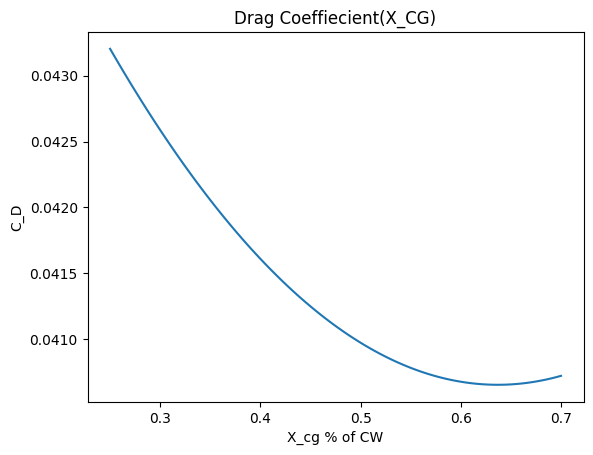

In [58]:
# Problem 1
x_cg_values = np.linspace(.25,.70,100)
lift_coefficients = [np.linalg.inv(np.array([[1,.25],[-.25+x_cg, -.25*(3-x_cg)]])) @ np.array([0.5,0.1]) for x_cg in x_cg_values]
C_D = [0.0325+0.035*CL_wf**2 + 0.03*CL_h**2 for CL_wf,CL_h in lift_coefficients]
plt.plot(x_cg_values,C_D)
plt.title('Drag Coeffiecient(X_CG)')
plt.ylabel('C_D')
plt.xlabel('X_cg % of CW')

In [59]:
# part c
C_Dmin = 1
x_cd_min = 0
for x,cd in enumerate(C_D):
  if cd < C_Dmin:
    C_Dmin = cd
    x_cd_min = ((.70-.25)/100)*x + .25
displayVariable('C_{D_{min}}',C_Dmin)
displayVariable('\\bar{X}_{cg}',x_cd_min)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

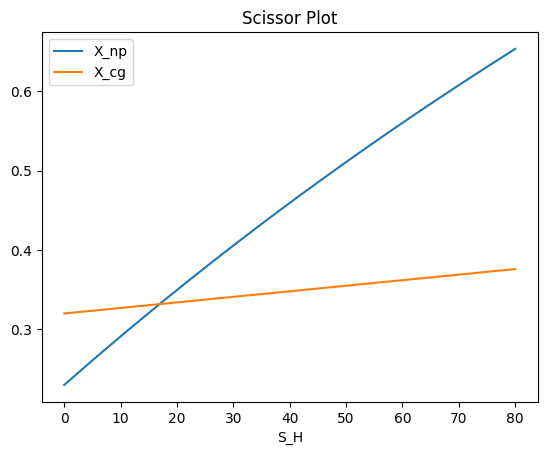

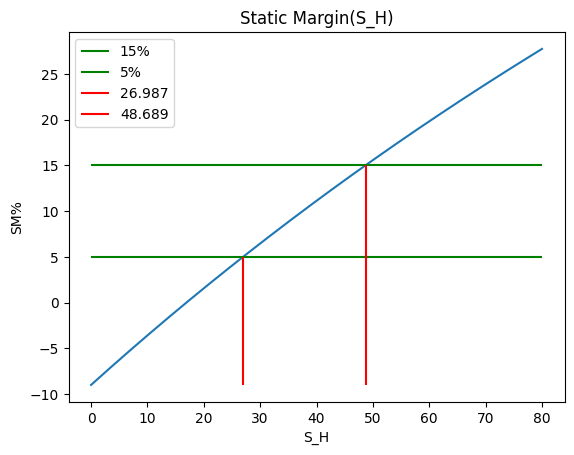

In [91]:
# Problem 3
c_w = 5.7
X_ac_wf = 0.23*c_w
eta_h = 0.9
S_w = 184
C_Lalpha_w = 4.44
AR_w = 6
C_Lalpha_h = 3.9
X_ac_h = 17
downwash_alpha = (2*C_Lalpha_w)/(np.pi*AR_w)
displayVariable('\\frac{d\\epsilon}{d\\alpha}', downwash_alpha)
S_h = symbols('S_H')
C_Lalpha = C_Lalpha_w + C_Lalpha_h*eta_h*S_h*(1-downwash_alpha)/S_w
displayVariable('C_{L_\\alpha}',C_Lalpha)
X_np = ((C_Lalpha_w*X_ac_wf/c_w)+C_Lalpha_h*eta_h*S_h*X_ac_h*(1-downwash_alpha)/(S_w*c_w))/C_Lalpha
displayVariable('\\bar{X}_{NP}',X_np)
X_np_lambda = lambdify(S_h,X_np)
S_h_values = np.linspace(0,80,1000)
X_np_values = [X_np_lambda(s) for s in S_h_values]
x_cg_values = [0.32+.0007*s for s in S_h_values]
plt.plot(S_h_values,X_np_values,label='X_np')
plt.plot(S_h_values,x_cg_values,label='X_cg')
plt.title('Scissor Plot')
plt.xlabel('S_H')
plt.legend()
plt.show()
static_margin = [(X_np_values[i]-x_cg_values[i])*100 for i in range(len(x_cg_values))]
tolerance = 0.02
for sh_index,sm in enumerate(static_margin):
  if sm - 5 < tolerance and 5 - sm < tolerance:
    SH_5 = S_h_values[sh_index]
  if sm - 15 < tolerance and 15 - sm < tolerance:
    SH_15 = S_h_values[sh_index]
plt.plot(S_h_values,static_margin)
plt.hlines(15,0,80,label='15%',colors='green')
plt.hlines(5,0,80,label="5%",colors='green')
plt.vlines(SH_5,-9,5,colors='red',label=str(round(SH_5,3)))
plt.vlines(SH_15,-9,15,colors='red',label=str(round(SH_15,3)))
plt.title('Static Margin(S_H)')
plt.ylabel('SM%')
plt.xlabel('S_H')
plt.legend()
plt.show()

In [61]:
# Problem 4
c_w = 5.7
S_w = 184
C_Lalpha_wf = 4.85
C_Lalpha_h = 3.77
S_h = 43
x_gc = 0.25
x_ac_wf = 0.23
eta_h = 0.9
delta_xbar_wf = x_gc-x_ac_wf
delta_xbar_ach = 11.7/c_w
C_Malpha = C_Lalpha_wf*delta_xbar_wf-C_Lalpha_h*eta_h*((S_h/S_w)*delta_xbar_ach)*(1-0.35)
displayVariable('C_{M_\\alpha}',C_Malpha)
C_Lalpha = C_Lalpha_wf+C_Lalpha_h*eta_h*(S_h/S_w)*(1-0.35)
Static_margin = -C_Malpha/C_Lalpha
displayEquations('SM',Static_margin*100)

<IPython.core.display.Math object>

<IPython.core.display.Math object>